# Proving PV=NRT and aproaching ideal Gas's Boltzman's Constant

The Idea.

We simulate a Box with chemically inert Particles with some inital Conditions.
The particles are going to interact with both each other and the Box itself, exchanging energy.


Cool Thought, What would happen if you have N-1 Stationary Particles but 1 particle with enoguh Momentum for N Particles. Would be cool to see this run haha.

In [1]:
# Inital Imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
#plt.style.use(['science','notebook'])
from itertools import combinations

Lets Create N Particles with random x and y positions

By Default the Size of the Container is 1mx1m. 

In [2]:
n_particles = 100
pos = np.random.random((2,n_particles)) # Creates Random Positions between [0,1) in the inputed shape
# Thats, 2 random flots for N particles. [[x1-xN],[y1-yN]] . x1-xN is one Row. x1,y1 is one column
# So pos[0] is x coordinates, pos[1] is y coordinates

left = pos[0] < 0.5 # Left Side stores in Bool
right = ~left

In [3]:
pos.shape

(2, 100)

Lets Give Tags to every Particle to identify them

In [4]:
tag = np.arange(n_particles)

Create A Basic Plot of these Particles

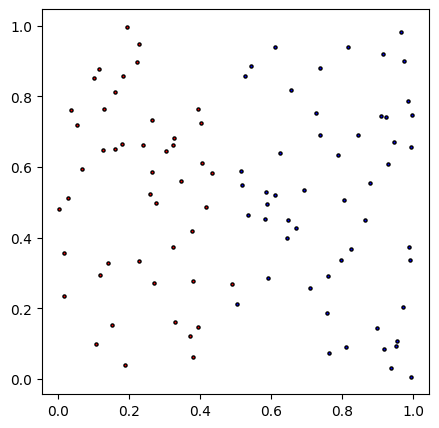

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(pos[0][left],pos[1][left],color='red',edgecolors='black',s=5) # s = 0.05 m is the radius of ball
plt.scatter(pos[0][right],pos[1][right],color='blue',edgecolors='black',s=5) # Not left is right.
plt.show()

Let's Propell these Particles, the ones on the left have speed of 500m/s, the one on the right have a speed of -500 m/s. The both move into each other. 

In [6]:
v = np.zeros((2,n_particles)) # Again, v[0] is x velcoity v[1] is y velcoity. [[vx],[vy]]

v[0][left] = 500
v[0][right] = -500

Now we want to Find the Distances between each pairs.
To do that we get an array of each particle paired with another. 
These pairs must be uniqe meaning, they cant pair with themselves and pair (i,j) is same as particle
(j,i). 

According to combinatorics there are n(n-1)/2 pairs like that. 



In [7]:
tag_pair = np.asarray(list(combinations(tag,2))) # Give a Pair (2) of uniqe combinatons from the list tags

Ex: If tag = [0, 1, 2, 3]
then list(combinations(tag, 2)) gives:

tag_pair = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)] ,4∗3/2=6 pairs.


Now we want the distances between each particle yes how do we do this?
We make the unique Pairs of particle tags we want distances from
Subtract the x position of second column from tag_pair from first column of tag_pair

pos has distances of each particle such that pos = [[x0,x1,x2,x3,xN],
                                                    [y0,y1,y2,y3,yN]]

so, 

In [8]:
x_distance = pos[0][tag_pair[:,1]] - pos[0][tag_pair[:,0]]
# Similarly lets get y
y_distance = pos[1][tag_pair[:,1]] - pos[1][tag_pair[:,0]]

net_distance = np.sqrt(np.abs(x_distance**2 - y_distance**2 )) # Abs cuz some invalid ones also come


Next we decide when the particles collide. 
The posiitons above are of the center of each particle
A collision occurs when the centers are equal to 2 times the radius

In [9]:
radius = 0.05 #m 

tags_collide = tag_pair[net_distance < 2*radius] # Gets Bool of tag Pairs that collide

Lets Give these Particles Velcotiies, 
We do this by thinking of them as having Elastic Collisions. WHich is true in a gas. 

Here since Kinetic ENergy is COnserved, and Momentum is always conserved in collisions. In vertor Space
We find that 

v1' = v1 - ((v1-v2)(r1-r2)/||r1-r2||**2 )* (r1-r2)

Now for what ever is Collisiding we have to do this Velcoity Switch.

We have the Pair of Colliding Particles in tags_collide. The first Column is v1 and Second Column is v2.

In [11]:
v1 = tags_collide[:,0]
v2 = tags_collide[:,1]

r1 = pos[:,tags_collide[:,0]]
r2 = pos[:,tags_collide[:,1]]

In [ ]:
# I am not sure Anymore... Let's See

array([-10, -16, -20, -39, -41, -69, -92, -97, -17, -22, -54, -56, -61,
       -65, -70, -79, -84, -97,  -3,  -4,  -9, -16, -19, -28, -36, -40,
       -42, -53, -59, -61, -65, -79, -91, -97, -21, -28, -34,  -4, -41,
       -45, -53, -64, -70, -78,  -6, -23, -38, -50, -57, -59, -61, -62,
       -76, -94, -12, -36, -38, -41, -42, -52, -57, -79, -88, -17, -20,
       -49, -55, -68, -72, -90,  -2, -36, -37, -41, -46, -52, -74, -80,
       -25, -28, -54, -62, -73, -29, -31, -50, -59, -72, -78, -80, -82,
        -7, -14, -18, -37, -40, -42, -54, -55, -56, -62, -65, -70, -75,
       -82, -12, -63, -87,  -2,  -9, -19, -64,  -6, -15, -36, -42, -48,
       -50, -64, -74, -75, -77, -84, -85,  -6,  -7,  -8, -23, -45, -46,
       -49, -55, -69, -17, -25, -35, -52, -76, -80, -81,  -2, -23, -25,
       -26, -41, -44, -68, -74, -76,  -5, -24, -30, -48, -49, -63, -67,
       -11, -13, -21, -23, -39, -54, -61, -66, -30, -34, -40, -42, -44,
       -49, -58, -68, -69, -76, -78,  -1,  -5, -17, -46, -49, -7